# Analysis Code for Uncertainity Scoping Review Paper

This code was used to plot figures and perform analysis for the paper titled:
 "Artificial Intelligence Uncertainty Quantification in Radiotherapy Applications - A Scoping Review".

 This notebook is organized in a similar fashion to how the data is presented in the paper. It contains the following sections: Initial, General Study Characteristics, Radiotherapy Characteristics, AI Characteristics, Uncertainty Quantification Characteristics, and Study Overlap with Previous Reviews.

 Note 1: Requires access to CSV files which are provided at the following Figshare doi: 10.6084/m9.figshare.25535017.

 Note 2: Ran this code out of Google Colab for simplicity. This is not required, the notebook can be run locally if desired.

 Note 3: To improve readability, some figure text was aesthetically modified in Adobe Illustrator after figure generation in Python.

 Last updated by: Kareem Wahid on May 11, 2024.


## Initial

Setting up the libraries, main dataframe, etc.

In [1]:
!python --version

Python 3.10.12


In [2]:
!pip install squarify

In [3]:
# Gerneral Dependencies

# datframe manipulation and plotting
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# world map
import geopandas as gpd

# Treemap plotting library
import squarify

# string matching
import difflib

In [4]:
# Only need to run if you're using a Colab Notebook in Google Drive enviornment
# Note: will request login credentials

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Uncertainity_scoping_review/Data/Modified_files/Code_for_GitHub

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Uncertainity_scoping_review/Data/Modified_files/Code_for_GitHub


In [5]:
# get dataframe
df = pd.read_csv("final_manuscript_data.csv")

In [6]:
def safe_convert_to_floats(df, col):
    return pd.to_numeric(df[col], errors='coerce')

numerical_cols = ['Training data (granular)', 'Training patients', 'Validation data (granular)',
                  'Validation patients', 'Testing data (granular)', 'Testing patients', 'Year']

for col in numerical_cols:
    df[col] = safe_convert_to_floats(df, col)


# for plotting purposes
df['Cancer type'] = df['Cancer type'].str.replace('*', '', regex=False)
df['Data availability'] = df['Data availability'].apply(lambda x: 'Yes' if x != 'No' else 'No')
df['Code availability'] = df['Code availability'].apply(lambda x: 'Yes' if x != 'No' else 'No')

# Function to determine Overall_availability based on conditions
def determine_availability(row):
    if row['Data availability'] == 'Yes' and row['Code availability'] == 'Yes':
        return 'Code and Data'
    elif row['Data availability'] == 'Yes' and row['Code availability'] == 'No':
        return 'Data only'
    elif row['Data availability'] == 'No' and row['Code availability'] == 'Yes':
        return 'Code only'
    else:
        return 'None'

# Apply function to each row
df['Overall avaliability'] = df.apply(determine_availability, axis=1)

In [7]:
df

,Study ID,Title,Manuscript type,Year,Location,Data availability,Code availability,RT application,Image data,Additional data,...,Validation type,Testing data (granular),Testing patients,Testing type,UQ application,UQ type,UQ method,UQ metric,UQ experiments,Overall avaliability
0,Dohopolski 2022,Uncertainty estimations methods for a deep lea...,Preprint,2022,United States,No,Yes,Outcome related,CT,Dose,...,Cross validation,54.0,54.0,Separate set [internal],Failure detection,Both,MC Dropout; Test-time Augmentation; Conformal ...,Entropy-based; Other,Quantitative,Code only
1,Outeiral 2023,A network score-based metric to optimize the q...,Standard publication,2023,Netherlands,No,Yes,Contouring,MRI,Target,...,Separate set,90.0,NaN,Separate set [internal],Failure detection,Unspecified,Direct softmax output,Probability-based,Quantitative + Qualitative,Code only
2,DeBiase 2024,Deep learning-based outcome prediction using P...,Standard publication,2024,Netherlands,No,No,Multiple,PET/CT,Dose+Clinical+Target+Probability map,...,Cross validation,100.0,100.0,Separate set [internal],Failure detection; Calibration,Unspecified,Ensembles,Probability-based,Quantitative,None
3,Rusanov 2024,Transformer CycleGAN with uncertainty estimati...,Standard publication,2024,Australia,No,No,Image synthesis,CT,NaN,...,Separate set,400.0,5.0,Separate set [internal],Failure detection; Calibration,Both,MC Dropout; Test-time Augmentation,Variance-based,Quantitative + Qualitative,None
4,Li 2024,Uncertainty-aware MR-based CT synthesis for ro...,Standard publication,2024,Switzerland,No,No,Multiple,Multimodal,Dose,...,Cross validation,10.0,10.0,Separate set [internal],Failure detection,Unspecified,Other Bayesian,Other,Quantitative + Qualitative,None
5,Luan 2023,Accurate and robust auto-segmentation of head ...,Standard publication,2023,China,Yes,No,Contouring,CT,OAR,...,Cross validation,68.0,68.0,Separate set [multiple external],Active learning,Unspecified,Direct softmax output,Probability-based,Quantitative + Qualitative,Data only
6,Grewal 2023,Learning Clinically Acceptable Segmentation of...,Conference proceeding,2023,Netherlands,No,Yes,Contouring,CT,OAR,...,Cross validation,105.0,95.0,Separate set [internal],Active learning,Epistemic,Other,Entropy-based,Quantitative,Code only
7,Lyu 2022,Conversion Between CT and MRI Images Using Dif...,Preprint,2022,United States,Yes,No,Image synthesis,Multimodal,NaN,...,Not specified,135.0,2.0,Separate set [internal],Failure detection,Unspecified,Other,Variance-based,Quantitative + Qualitative,Data only
8,Jungo 2018,Uncertainty-driven Sanity Check: Application t...,Conference proceeding,2018,Switzerland,No,No,Contouring,MRI,Target,...,Not specified,5.0,5.0,Cross validation,Failure detection,Unspecified,MC Dropout,Entropy-based,Quantitative + Qualitative,None
9,vanHarten 2020,Automatic Online Quality Control of Synthetic CTs,Conference proceeding,2020,Netherlands,No,No,Image synthesis,Multimodal,NaN,...,Separate set,74.0,74.0,Separate set [multiple external],Failure detection,Unspecified,Ensembles,Other,Quantitative + Qualitative,None


## General Study Characteristics

In [8]:
# geoplot

# Assuming df is your DataFrame and it has a column 'Country' with country names
country_counts = df['Location'].value_counts().reset_index()
country_counts.columns = ['Location', 'Count']

name_mapping = {
    'United States': 'United States of America',
    'Korea': 'South Korea',  # Assuming "Korea" refers to South Korea
    # Other countries are presumed to match. If discrepancies arise, add them here.
}

# Apply the mapping to your DataFrame
country_counts['Location'] = country_counts['Location'].map(name_mapping).fillna(country_counts['Location'])

country_coords = {
    'Location': [
        'Australia', 'Canada', 'China', 'Germany', 'Japan',
        'Korea', 'Netherlands', 'Spain', 'Sweden', 'Switzerland',
        'United Kingdom', 'United States'
    ],
    'Latitude': [
        -25.274398, 56.130366, 35.861660, 51.165691, 36.204824,
        35.907757, 52.132633, 40.463667, 60.128161, 46.818188,
        55.378051, 37.090240
    ],
    'Longitude': [
        133.775136, -106.346771, 104.195397, 10.451526, 138.252924,
        127.766922, 5.291266, -3.74922, 18.643501, 8.227512,
        -3.435973, -95.712891
    ]
}

coords_df = pd.DataFrame(country_coords)

merged_df = pd.merge(country_counts, coords_df, on='Location', how='inner')

# Load a GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'Country': 'Location'})

# Merge the GeoDataFrame with your data
world = world.merge(country_counts, how="left", left_on="name", right_on="Location")


<ipython-input-8-6643e8cb3ad6>:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [9]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Location,Count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,4.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,13.0
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN


<ipython-input-10-0376f3fe9269>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_yticklabels(cbar.get_yticks().astype(int))  # Set tick labels to integer values


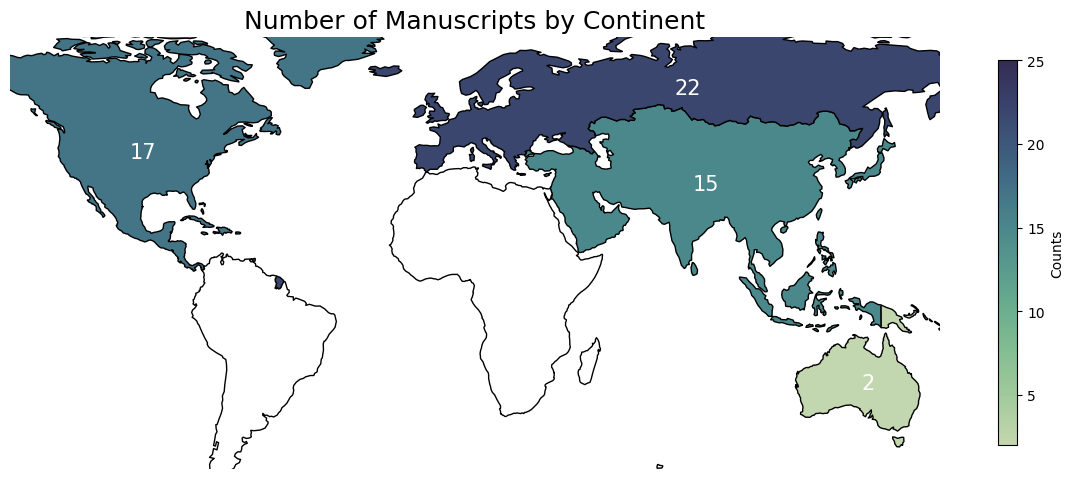

In [10]:
# Generate the custom palette with seaborn
custom_palette = sns.cubehelix_palette(start=.5, rot=-.75, light=0.8, dark=0.2, as_cmap=True)

# Aggregate counts by continent, summing 'Count', and replacing 0 with NaN *after* aggregation
continent_data = world.dissolve(by='continent', aggfunc='sum').replace(0, np.nan)

# Now, plotting with corrected handling of 0 values (now NaN)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
continent_data.plot(column='Count', ax=ax, legend=True,
                    legend_kwds={'label': "Counts",
                                 'shrink': 0.5, 'aspect': 20},
                    cmap=custom_palette,
                    missing_kwds={'color': 'white'},  # Ensure NaN values are colored white
                    edgecolor='black',
                    vmax=25)

ax.set_title('Number of Manuscripts by Continent', size=18)
plt.axis('off')  # Turn off the axis for a cleaner look

# Set the limits for the x and y axes
ax.set_xlim([-140, 160])
ax.set_ylim([-50, 75])

# Iterate through the continents to place text annotations
for idx, row in continent_data.iterrows():
    # Calculate the centroid of the continent polygon
    centroid = row.geometry.centroid
    # Check if 'Count' is NaN. If not, convert to int and annotate. Otherwise, use a placeholder or skip.
    if pd.notnull(row['Count']):  # If 'Count' is not NaN
        count_text = str(int(row['Count']))  # Convert to int and then to string
    else:
        count_text = ""  # Or use "N/A" or any other placeholder you prefer

    # Place a text annotation with the continent's 'Count' value or placeholder
    if idx == "North America":
      ax.text(centroid.x-5, centroid.y-15, count_text, horizontalalignment='center', verticalalignment='center', size=15, color='w')
    else:
      ax.text(centroid.x, centroid.y, count_text, horizontalalignment='center', verticalalignment='center', size=15, color='w')

# Adjust the appearance of the colorbar to display whole numbers
# Find the colorbar in the figure
cbar = fig.axes[-1]  # The colorbar should be the last axis object in the figure
cbar.set_yticklabels(cbar.get_yticks().astype(int))  # Set tick labels to integer values

# save
#filename = 'heatmap.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

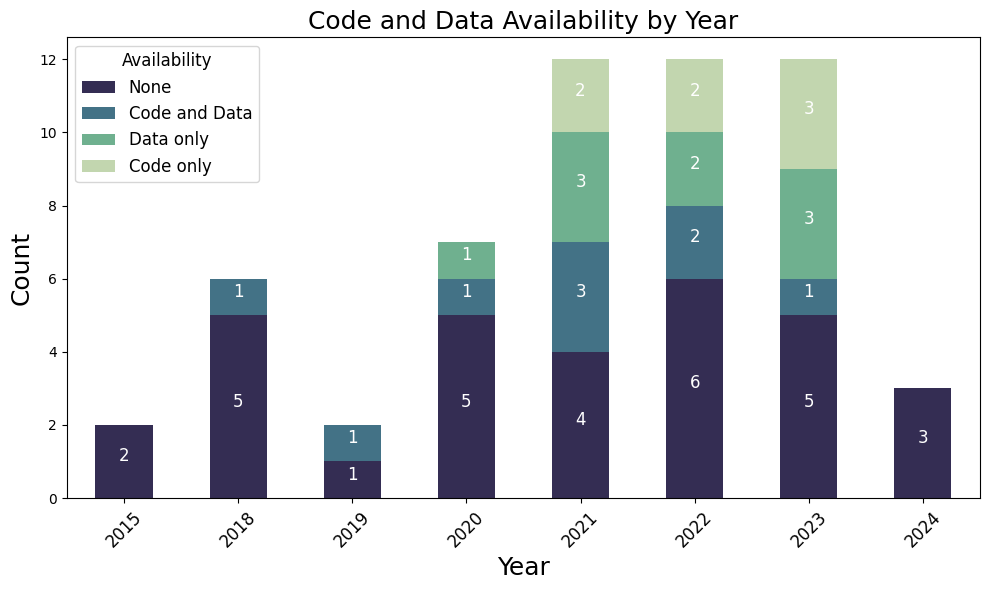

In [11]:
# Assuming df is already defined and contains the necessary data
df['Year'] = pd.Categorical(df['Year'])
pivot_df = pd.crosstab(index=df['Year'], columns=df['Overall avaliability'])

# Sort columns in the pivot table based on their total count descending
sorted_columns = pivot_df.sum().sort_values(ascending=False).index
pivot_df = pivot_df[sorted_columns]

# Generate a cubehelix_palette
n_segments = len(pivot_df.columns)
palette = sns.cubehelix_palette(n_segments, start=.5, rot=-.75, light=0.8, dark=0.2)
palette.reverse()  # Reverse the order of the colors

# Plotting with the cubehelix_palette
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)

plt.title('Code and Data Availability by Year', size=18)
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)
plt.xticks(rotation=45, size=12)  # Rotate labels to make them readable
plt.legend(title="Availability", prop={'size': 12}, title_fontsize=12)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Adding the count annotation on each stack within the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add annotation to non-zero stacks
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', color='white', size=12)

# Uncomment the line below to save the plot as a PDF
#filename = 'code_year.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

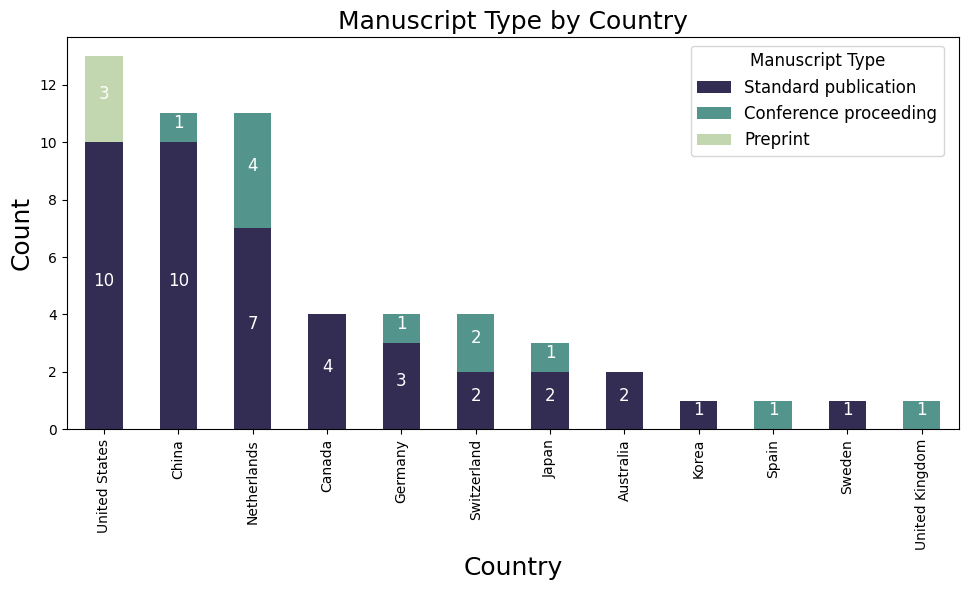

In [12]:
# Group the data by 'Region_fixed' and 'Manuscript_fixed' and count the occurrences
grouped_data = df.groupby(['Location', 'Manuscript type']).size().unstack(fill_value=0)

# Calculate the total count for each 'Region_fixed' and sort in descending order
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data_sorted = grouped_data.sort_values('Total', ascending=False)

# Sort columns in the pivot table based on their total count descending
sorted_columns = grouped_data_sorted.sum().sort_values(ascending=False).index
grouped_data_sorted = grouped_data_sorted[sorted_columns]

# Generate a color palette with seaborn, light to dark
n_categories = grouped_data_sorted.drop('Total', axis=1).shape[1]  # Number of manuscript categories
palette = sns.cubehelix_palette(n_categories, start=.5, rot=-.75, light=0.8, dark=0.2)
palette.reverse()  # Reverse the order of the colors

# Plotting the stacked barplot with the generated palette
ax = grouped_data_sorted.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)

plt.title('Manuscript Type by Country', size=18)
plt.xlabel('Country', size=18)
plt.ylabel('Count', size=18)
plt.legend(title = "Manuscript Type", bbox_to_anchor=(0.69, 1), loc='upper left', prop={'size': 12}, title_fontsize=12)

# Adding the count annotation on each stack within the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add annotation to non-zero stacks
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', color='white', size=12)

plt.tight_layout()

#save
#filename = 'location.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

## Radiotherapy Characteristics


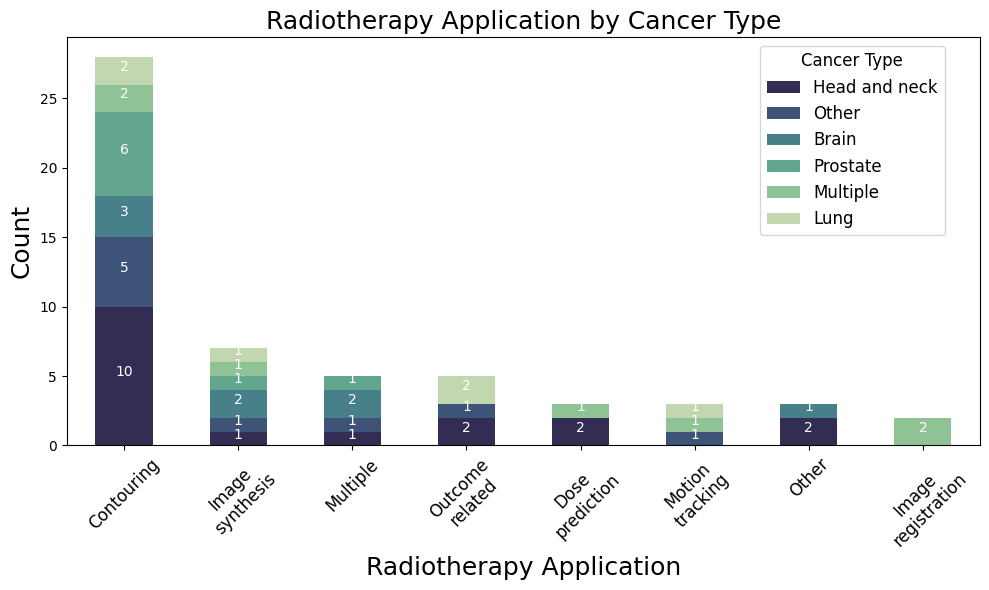

In [13]:
# Function to replace all but the top categories with 'Other' and return replaced labels
def replace_with_other(df, column, count):
    top = df[column].value_counts().nlargest(count).index
    replaced_labels = df.loc[~df[column].isin(top), column].unique()
    df.loc[~df[column].isin(top), column] = 'Other'
    return df, replaced_labels

# Make a copy of the dataframe
df_2 = df.copy()

# Apply the function to both columns and get replaced labels
df_2, replaced_labels_cancer = replace_with_other(df_2, 'Cancer type', 5)
df_2, replaced_labels_rt = replace_with_other(df_2, 'RT application', 7)

# Combine the replaced labels into strings for annotation
replaced_labels_cancer_str = ', '.join(replaced_labels_cancer)
replaced_labels_rt_str = ', '.join(replaced_labels_rt)

# Group the data by the modified columns and count occurrences
grouped_data = df_2.groupby(['RT application', 'Cancer type']).size().unstack(fill_value=0)

# Sort the grouped data in descending order based on the total count for each RT_application_fixed category
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data_sorted = grouped_data.sort_values('Total', ascending=False)

# Sort columns in the pivot table based on their total count descending
sorted_columns = grouped_data_sorted.sum().sort_values(ascending=False).index
grouped_data_sorted = grouped_data_sorted[sorted_columns]

# Generate a color palette with seaborn, light to dark
n_categories = len(grouped_data_sorted.columns) - 1  # Exclude 'Total' from the count
palette = sns.cubehelix_palette(n_categories, start=.5, rot=-.75, light=0.8, dark=0.2)
palette.reverse()  # Reverse the order of the colors

# Plotting the stacked barplot with the generated palette
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data_sorted.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax, color=palette)

# Insert line breaks into x-axis labels
ax.set_xticklabels(['\n'.join(text.get_text().split()) for text in ax.get_xticklabels()])

plt.title('Radiotherapy Application by Cancer Type', size=18)
plt.xlabel('Radiotherapy Application', size=18)
plt.xticks(rotation=45, size=12)
plt.ylabel('Count', size=18)
plt.legend(title = "Cancer Type", bbox_to_anchor=(0.75, 1), loc='upper left', prop={'size': 12}, title_fontsize=12)

# Adding the count annotation on each stack within the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add annotation to non-zero stacks
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', color='white', size=10)

"""
# Add a separate text box for the 'Other' category labels
other_labels_text = (f'Other Categories:\nCancer_type_fixed includes: {replaced_labels_cancer_str}\n'
                     f'RT_application_fixed includes: {replaced_labels_rt_str}')
plt.gcf().text(0.02, -0.08, other_labels_text, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
"""

plt.tight_layout()

#save
#filename = 'RT_cancer.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

['Dose+Clinical+Target+Probability map' 'Registration_transforms'
 'Repiratory trace' 'Clinical' 'Fiducial' 'Target+Clinical'
 'Dose+Clinical' 'K-space']


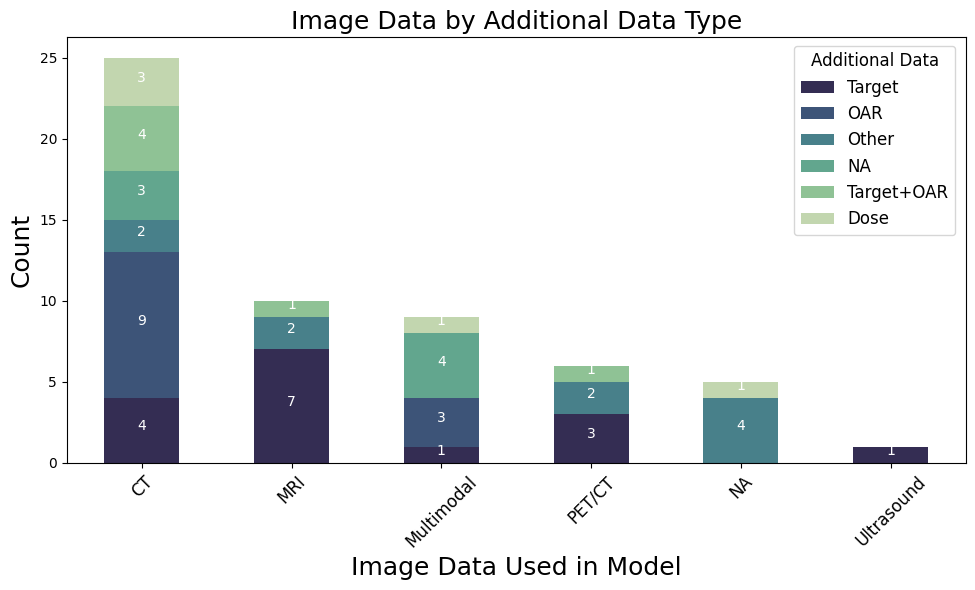

In [14]:
# Function to replace all but the top categories with 'Other' and return replaced labels
def replace_with_other(df, column, count):
    top = df[column].value_counts().nlargest(count).index
    replaced_labels = df.loc[~df[column].isin(top), column].unique()
    df.loc[~df[column].isin(top), column] = 'Other'
    return df, replaced_labels

# Make a copy of the dataframe
df_2 = df.copy()

# Replace all NaN values in the dataframe with 'NA', needed for this code to work
df_2['Image data'].fillna('NA', inplace=True)
df_2['Additional data'].fillna('NA', inplace=True)

# Apply the function only to Additional_data column
df_2, replaced_labels_rt = replace_with_other(df_2, 'Additional data', 5)
print(replaced_labels_rt)

# Combine the replaced labels into a string for annotation
replaced_labels_rt_str = ', '.join(replaced_labels_rt)

# Group the data by Image_data and modified Additional_data and count occurrences
grouped_data = df_2.groupby(['Image data', 'Additional data']).size().unstack(fill_value=0)

# Sort the grouped data in descending order based on the total count for each Image_data category
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data_sorted = grouped_data.sort_values('Total', ascending=False)

# Sort columns in the pivot table based on their total count descending
sorted_columns = grouped_data_sorted.sum().sort_values(ascending=False).index
grouped_data_sorted = grouped_data_sorted[sorted_columns]

# Generate a color palette with seaborn, light to dark
n_categories = len(grouped_data_sorted.columns) - 1  # Exclude 'Total' from the count
palette = sns.cubehelix_palette(n_categories, start=.5, rot=-.75, light=0.8, dark=0.2)
palette.reverse()  # Reverse the order of the colors

# Plotting the stacked barplot with the generated palette
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data_sorted.drop('Total', axis=1).plot(kind='bar', stacked=True, ax=ax, color=palette)

plt.title('Image Data by Additional Data Type', size=18)
plt.xlabel('Image Data Used in Model', size=18)
plt.xticks(rotation=45, size=12)
plt.ylabel('Count', size=18)
plt.legend(title='Additional Data', bbox_to_anchor=(0.8, 1), loc='upper left', prop={'size': 12}, title_fontsize=12)

# Adding the count annotation on each stack within the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add annotation to non-zero stacks
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', color='white', size=10)

"""
# Add a separate text box for the 'Other' category label
other_labels_text = f'Additional_data (Other includes: {replaced_labels_rt_str})'
plt.gcf().text(0.02, -0.06, other_labels_text, fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
"""

plt.tight_layout()

#save
#filename = 'Image_additional.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

## AI Characteristics

<ipython-input-15-868beb702c50>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='variable', y='value', data=long_df, ax=ax, palette=palette, size = 8, alpha=0.8)
<ipython-input-15-868beb702c50>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='variable', y='value', data=long_df, ax=ax2, palette=palette, size = 8, alpha=0.8)
<ipython-input-15-868beb702c50>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Training', 'Validation', 'Testing'], size = 15)


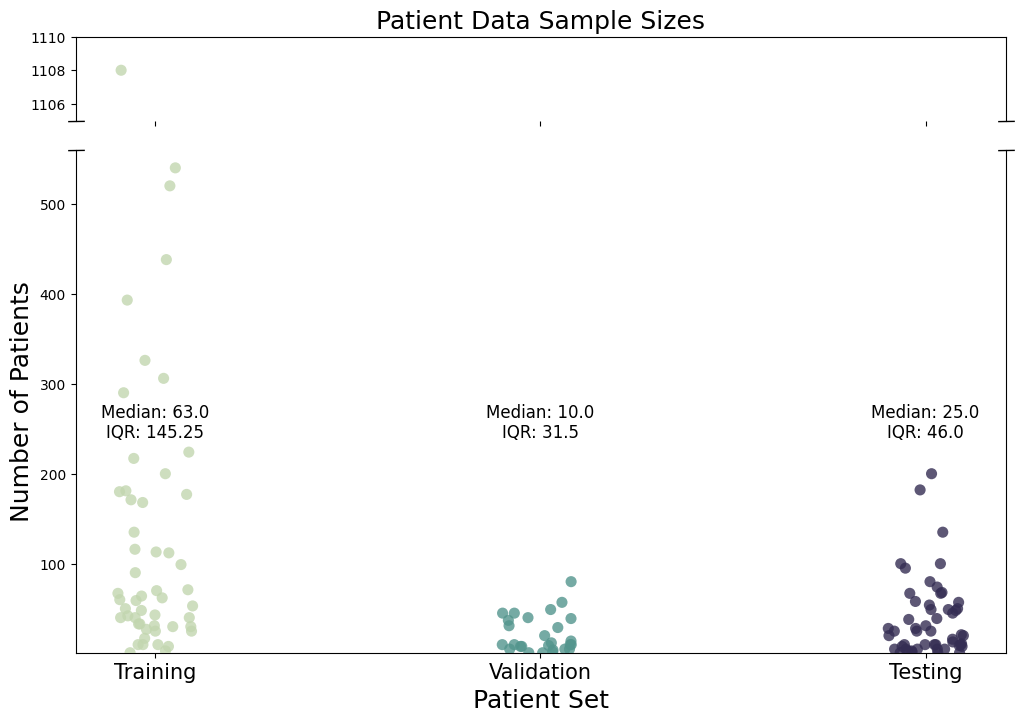

In [15]:
numerical_cols = ['Training patients', 'Validation patients', 'Testing patients']
long_df = pd.melt(df, value_vars=numerical_cols)

# Generate a color palette
n_colors = len(numerical_cols)
palette = sns.cubehelix_palette(n_colors, start=.5, rot=-.75, light=0.8, dark=0.2)

# Define the range for the break in the y-axis
break_start = 560
break_end = 1105

# Create subplots with adjusted heights
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8),
                              gridspec_kw={'height_ratios': [1, 6]})
fig.subplots_adjust(hspace=0.1)  # Adjust space between plots

# Set the seed for numpy's random number generator to make the jitter reproducible
np.random.seed(42)

# Plot the same data on both axes with the generated palette
sns.stripplot(x='variable', y='value', data=long_df, ax=ax, palette=palette, size = 8, alpha=0.8)
sns.stripplot(x='variable', y='value', data=long_df, ax=ax2, palette=palette, size = 8, alpha=0.8)

# Set limits for y-axis on both subplots to create a break effect
ax.set_ylim(break_end, long_df['value'].max() + 2)
ax2.set_ylim(long_df['value'].min(), break_start)

# Hide the spines between ax and ax2, and add diagonal lines to indicate the break
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
d = .015  # Size of diagonal lines
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Set titles, labels, etc.
ax.set_title('Patient Data Sample Sizes', size=18)
ax2.set_xlabel('Patient Set', size = 18)
ax2.set_xticklabels(['Training', 'Validation', 'Testing'], size = 15)
ax2.set_ylabel('Number of Patients', size = 18)
ax.set_ylabel('') # make blank
#plt.xticks(rotation=45)

# Annotate median and IQR for each category
for index, col in enumerate(numerical_cols):
    median_val = long_df[long_df['variable'] == col]['value'].median()
    q1 = long_df[long_df['variable'] == col]['value'].quantile(0.25)
    q3 = long_df[long_df['variable'] == col]['value'].quantile(0.75)
    iqr_val = q3 - q1
    ax2.annotate(f'Median: {median_val}\nIQR: {iqr_val}',
                 xy=(col, 240),
                 xytext=(0, 0),
                 textcoords='offset points',
                 ha='center',
                 size=12)

# save
filename = 'ptsize_strpiplot.pdf'
#plt.savefig(filename, format='pdf', bbox_inches='tight')

plt.show()

<ipython-input-16-925adc310511>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=col, data=df, order=order, palette=palette)


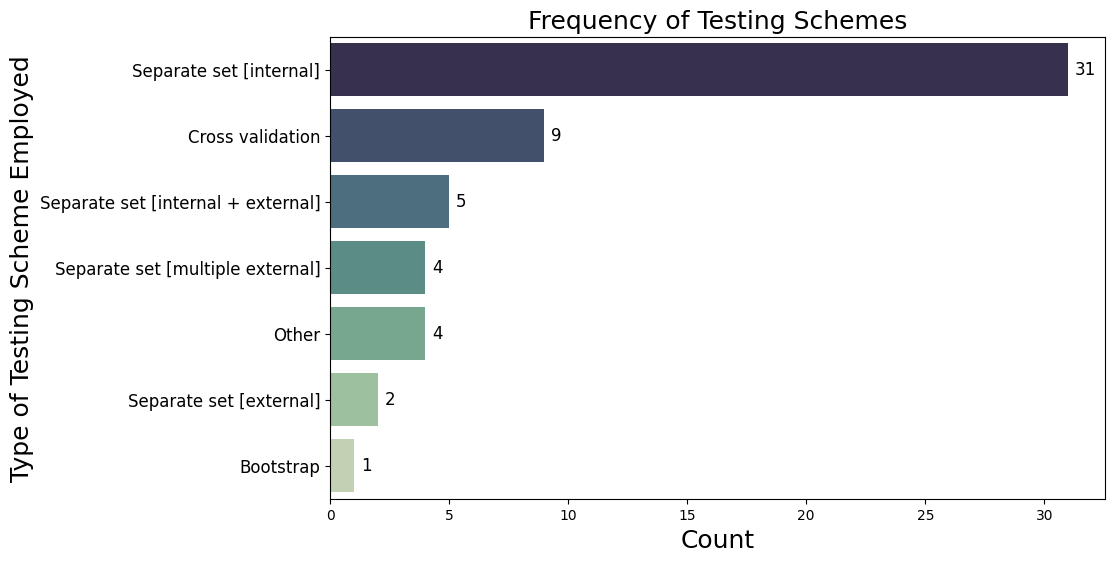

In [16]:
# Visualizations for selected categorical data with bars in order of decreasing count


#categorical_cols = ['ML type', 'UQ metric', 'UQ application', 'Testing type']
categorical_cols = ['Testing type'] # only care about this for final manuscript

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    order = df[col].value_counts().index
    n_colors = len(order)

    # Generate a color palette with seaborn, light to dark
    palette = sns.cubehelix_palette(n_colors, start=.5, rot=-.75, light=0.8, dark=0.2)
    palette.reverse()  # Reverse the order of the colors

    ax = sns.countplot(y=col, data=df, order=order, palette=palette)

    # Manually add labels to each bar
    for i, p in enumerate(ax.patches):
        width = p.get_width()  # Get the numerical value of the width (count)
        ax.annotate(f'{int(width)}',  # Convert width to integer and format as string
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center',
                    xytext=(5, 0), textcoords='offset points',
                    size=12)

    #plt.title(f'Count Plot of {col}', size = 18)
    plt.title('Frequency of Testing Schemes', size = 18)
    plt.xlabel('Count', size = 18)
    plt.yticks(size=12)
    plt.ylabel("Type of Testing Scheme Employed", size =18)

    # save
    #filename = f'{col}.pdf'
    #plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

## Uncertainty Quantification Characteristics

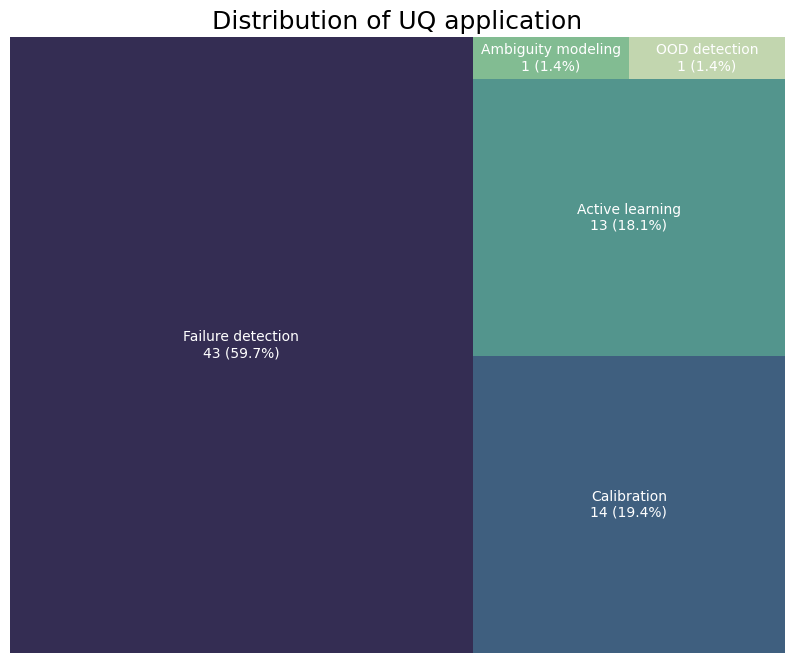

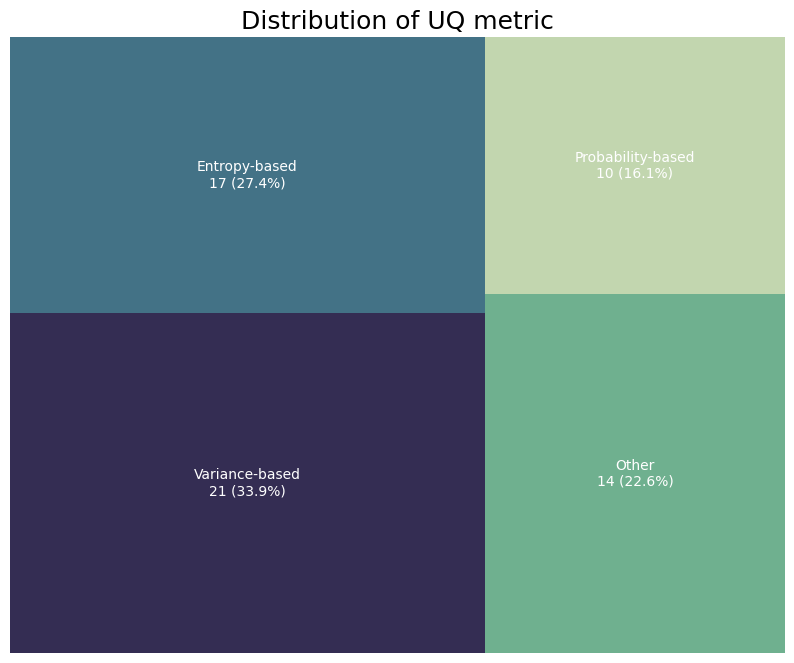

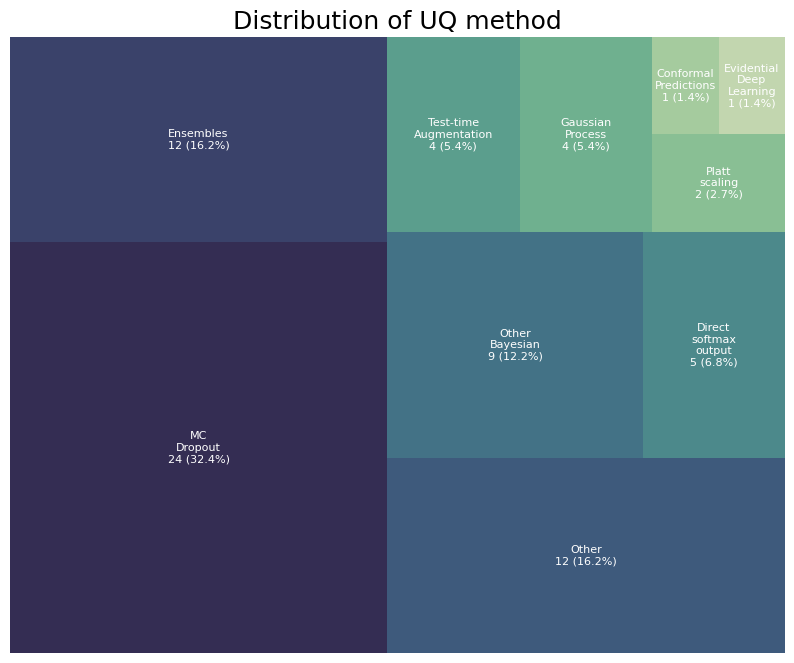

In [17]:
categorical_cols = ['UQ application', 'UQ metric', 'UQ method']

for col in categorical_cols:
    df_sub = df[col].str.split('; ').explode()
    application_counts = df_sub.value_counts()

    # Calculate the total count to find percentages
    total_count = application_counts.sum()
    percentages = (application_counts / total_count * 100).round(1)

    # Combine the category, count, and percentage into a new label
    new_labels = []
    for label, count, perc in zip(application_counts.index, application_counts, percentages):
        if col == 'UQ method':
            # Specific formatting for 'UQ method'
            formatted_label = '\n'.join(label.split())  # Split the label into words and join with new lines
            new_label = f"{formatted_label}\n{count} ({perc}%)"
        else:
            # Standard formatting for other columns
            new_label = f"{label}\n{count} ({perc}%)"
        new_labels.append(new_label)

    # Generate a color palette with seaborn, light to dark
    n_segments = len(application_counts)
    palette = sns.cubehelix_palette(n_segments, start=.5, rot=-.75, light=0.8, dark=0.2)
    palette.reverse()  # Reverse the order of the colors

    # Create a treemap
    plt.figure(figsize=(10, 8))
    if col == 'UQ method':
      squarify.plot(sizes=application_counts.values, label=new_labels, color=palette, alpha=1, text_kwargs={'fontsize':8, 'color':'white'})
    else:
      squarify.plot(sizes=application_counts.values, label=new_labels, color=palette, alpha=1, text_kwargs={'fontsize':10, 'color':'white'})

    plt.title(f'Distribution of {col}', size=18)
    plt.axis('off')  # Disable the axis

    # Save
    #filename = f'treemap_{col}.pdf'
    #plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

## Study Overlap with Previous Reviews


In [18]:
# Open the Excel file
file_path = 'overlap_data.xlsx'

# Initialize an empty list to hold data from each sheet
all_data = []

# Loop through the first six sheets
# Assuming the Excel file has at least 6 sheets and they are indexed from 0
for i in range(6):
    # Read the sheet at index i
    df = pd.read_excel(file_path, sheet_name=i)

    # Append the DataFrame to the list of all data
    all_data.append(df)

# Concatenate all DataFrames into one
final_df = pd.concat(all_data, ignore_index=True)

In [19]:
final_df

,Review,Study ID,Title,DOI
0,Wahid,Dohopolski 2022,Uncertainty estimations methods for a deep lea...,https://doi.org/10.48550/arXiv.2210.00589
1,Wahid,Outeiral 2023,A network score-based metric to optimize the q...,https://doi.org/10.1016/j.phro.2023.100500
2,Wahid,DeBiase 2024,Deep learning-based outcome prediction using P...,https://doi.org/10.1016/j.cmpb.2023.107939
3,Wahid,Rusanov 2024,Transformer CycleGAN with uncertainty estimati...,https://doi.org/10.1088/1361-6560/ad1cfc
4,Wahid,Li 2024,Uncertainty-aware MR-based CT synthesis for ro...,https://doi.org/10.1016/j.radonc.2023.110056
...,...,...,...,...
520,Seoni,"Zakeri et al. [165], 2023",DragNet: learning-based deformable registratio...,https://doi.org/10.1016/j.media.2022.102678
521,Seoni,"Dolezal et al. [173], 2023",Slideflow: Deep Learning for Digital Histopath...,https://doi.org/10.48550/arXiv.2304.04142
522,Seoni,"Abdullah et al. [172], 2023",Uncertainty quantification for MLP-mixer using...,https://doi.org/10.3390/app13074547
523,Seoni,"Abdar et al. [164], 2023",Hercules: deep hierarchical attentive multilev...,https://doi.org/10.1109/TII.2022.3168887


In [20]:
# Set the option to display full content of the column
pd.set_option('display.max_colwidth', None)

In [21]:
# Separating entries reviewed by "Wahid" and others
wahid_df = final_df[final_df["Review"] == "Wahid"]
other_df = final_df[final_df["Review"] != "Wahid"]

# Empty list to store detailed matches
matches = []

# Checking DOI and Title matches
for _, wahid_row in wahid_df.iterrows():
    for _, other_row in other_df.iterrows():
        if wahid_row["DOI"] == other_row["DOI"]:
            matches.append((wahid_row["Title"], other_row["Review"], other_row["Title"], "DOI Match"))
        else:
            # Calculate similarity between titles
            similarity = difflib.SequenceMatcher(None, wahid_row["Title"].lower(), other_row["Title"].lower()).ratio()
            if similarity >= 0.75:
                matches.append((wahid_row["Title"], other_row["Review"], other_row["Title"], "Title Match"))

# Convert results to DataFrame for better visualization
detailed_matches_df = pd.DataFrame(matches, columns=["Wahid Title", "Matching Review", "Other Title", "Match Type"])

# Group by Review to calculate overlapping citations and list specific titles
summary = detailed_matches_df.groupby('Matching Review').agg(
    Overlapping_Citations=('Matching Review', 'size'),
    Specific_Overlapping_Manuscript_Titles=('Other Title', lambda x: list(x))
).reset_index()

# Total citations per reviewer
total_citations = final_df.groupby('Review').size().to_frame('Total_Citations').reset_index()

# Merge to calculate percentages
summary = summary.merge(total_citations, left_on='Matching Review', right_on='Review', how='left')
summary['Overlapping/Total (%)'] = (summary['Overlapping_Citations'] / summary['Total_Citations'] * 100).round(2)
summary = summary.drop(columns=['Review'])

# Prepare final table with required columns
final_summary = summary[['Matching Review', 'Overlapping/Total (%)', 'Specific_Overlapping_Manuscript_Titles']]


In [22]:
detailed_matches_df

,Wahid Title,Matching Review,Other Title,Match Type
0,Uncertainty-driven Sanity Check: Application to Postoperative Brain Tumor Cavity Segmentation,Zhou,Uncertainty-driven sanity check: Application to postoperative brain tumor cavity segmentation,DOI Match
1,Uncertainty-driven Sanity Check: Application to Postoperative Brain Tumor Cavity Segmentation,Lambert,Uncertainty-driven sanity check: Application to postoperative brain tumor cavity segmentation,DOI Match
2,On the Effect of Inter-observer Variability for a Reliable Estimation of Uncertainty of Medical Image Segmentation,Zhou,On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation,DOI Match
3,On the Effect of Inter-observer Variability for a Reliable Estimation of Uncertainty of Medical Image Segmentation,Lambert,On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation,DOI Match
4,On the Effect of Inter-observer Variability for a Reliable Estimation of Uncertainty of Medical Image Segmentation,Seoni,On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation,DOI Match
5,Uncertainty in Multitask Learning: Joint Representations for Probabilistic MR-only Radiotherapy Planning,Zhou,Uncertainty in Multitask Learning: Joint Representations for Probabilistic MR-only Radiotherapy Planning,DOI Match
6,Automatic segmentation of gross target volume of nasopharynx cancer using ensemble of multiscale deep neural networks with spatial attention,Lambert,Automatic segmentation of gross target volume of nasopharynx cancer using ensemble of multiscale deep neural networks with spatial attention,Title Match
7,"Personalized Radiotherapy Design for Glioblastoma: Integrating Mathematical Tumor Models, Multimodal Scans, and Bayesian Inference.",Seoni,"Personalized radiotherapy design for glioblastoma: integrating mathematical tumor models, multimodal scans, and Bayesian inference",DOI Match
8,A deep learning-based framework for segmenting invisible clinical target volumes with estimated uncertainties for post-operative prostate cancer radiotherapy.,Lambert,A deep learning-based framework for segmenting invisible clinical target volumes with estimated uncertainties for post-operative prostate cancer radiotherapy,DOI Match


In [23]:
final_summary

,Matching Review,Overlapping/Total (%),Specific_Overlapping_Manuscript_Titles
0,Lambert,1.84,"[Uncertainty-driven sanity check: Application to postoperative brain tumor cavity segmentation, On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation, Automatic segmentation of gross target volume of nasopharynx cancer using ensemble of multiscale deep neural networks with spatial attention, A deep learning-based framework for segmenting invisible clinical target volumes with estimated uncertainties for post-operative prostate cancer radiotherapy]"
1,Seoni,1.39,"[On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation, Personalized radiotherapy design for glioblastoma: integrating mathematical tumor models, multimodal scans, and Bayesian inference]"
2,Zhou,5.36,"[Uncertainty-driven sanity check: Application to postoperative brain tumor cavity segmentation, On the effect of inter-observer variability for a reliable estimation of uncertainty of medical image segmentation, Uncertainty in Multitask Learning: Joint Representations for Probabilistic MR-only Radiotherapy Planning]"
